# daytrade target finder
20190312

In [3]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly as py
import plotly.offline as plyo
from plotly.graph_objs import Contours, Histogram2dContour, Marker, Scatter
import cufflinks as cf #  google colaboratoryでは install できない
plt.style.use('seaborn')
#!pip install jsm # necessary for google colaboratory
import jsm
#!pip install mpl_finance # necessary for google colaboratory
import mpl_finance
# if an error occurs for importing cufflinks, do 
# pip install --upgrade plotly
# pip install --upgrade cufflinks
# pip install --upgrade ipywidgets

import os, sys
module_path = os.path.abspath(os.path.join('./utils'))
if module_path not in sys.path:
    sys.path.append(module_path)
from read_nikkei import get_jstock

## analyze 

In [5]:
from IPython.display import HTML, display, Math
import tabulate

In [6]:
today = datetime.datetime.now().strftime("%Y%m%d")
print("today is {}".format(today))

today is 20190312


In [4]:
codes = [8892, 9685, 3926]

In [5]:
q = jsm.Quotes()
start = datetime.date(2018, 9, 1)
end = datetime.date(2019, 1, 18)

data = {}
for c in codes:
    data[str(c)] = q.get_finance(c)

/Users/sishida/.pyenv/versions/3.6.3/envs/btc3.6/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/sishida/.pyenv/versions/3.6.3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")




In [6]:
def get_table_by(code):
    if type(code) == int:
        code = str(code)
    return [["時価総額", data[code].market_cap],
            ["発行済株式数", data[code].shares_issued],
            ["配当利回り", data[code].dividend_yield],
            ["1株配当", data[code].dividend_one],
            ["株価収益率", data[code].per],
            ["純資産倍率", data[code].pbr],
            ["1株利益", data[code].eps],
            ["1株純資産", data[code].bps],
            ["最低購入代金", data[code].price_min],
            ["単元株数", data[code].round_lot],
            ["年初来高値", data[code].years_high],
            ["年初来安値", data[code].years_low]]

In [8]:
brand = q.get_brand() # TAKES TOO  LONG!!!!!

/Users/sishida/.pyenv/versions/3.6.3/envs/btc3.6/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/sishida/.pyenv/versions/3.6.3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")




In [14]:
from pickle_handler import save_dict, load_dict

In [15]:
save_dict(brand, '20190122-brand')

NameError: name 'pickle' is not defined

In [16]:
category = [
        '0050', # 農林・水産業
        '1050', # 鉱業
        '2050', # 建設業
        '3050', # 食料品
        '3100', # 繊維製品
        '3150', # パルプ・紙
        '3200', # 化学
        '3250', # 医薬品
        '3300', # 石油・石炭製品
        '3350', # ゴム製品
        '3400', # ガラス・土石製品
        '3450', # 鉄鋼
        '3500', # 非鉄金属
        '3550', # 金属製品
        '3600', # 機械
        '3650', # 電気機器
        '3700', # 輸送機器
        '3750', # 精密機器
        '3800', # その他製品
        '4050', # 電気・ガス業
        '5050', # 陸運業
        '5100', # 海運業
        '5150', # 空運業
        '5200', # 倉庫・運輸関連業
        '5250', # 情報・通信
        '6050', # 卸売業
        '6100', # 小売業
        '7050', # 銀行業
        '7100', # 証券業
        '7150', # 保険業
        '7200', # その他金融業
        '8050', # 不動産業
        '9050' # サービス業
    ]

In [17]:
def show_company_info_by_code(code):
    for ct in category:
        #print("for {}, # of entries is {}".format(c, len(brand[c])))
        for n in brand[ct]:
            if n.ccode == str(code):
                print("----------")
                print("{}".format(n.ccode))
                print("{}".format(n.name))
                print("{}".format(n.market))
                print("{}".format(n.info))
                print("----------")
                break    

In [18]:
for c in codes:
    show_company_info_by_code(c)
    display(HTML(tabulate.tabulate(get_table_by(c), tablefmt='html', floatfmt=".2f")))

----------
8892
(株)日本エスコン
東証1部
総合不動産。マンション分譲から商業施設やホテル開発など業容拡大。中部電力が筆頭株主
----------


時価総額,58323.00
発行済株式数,71649387.00
配当利回り,3.93
1株配当,32.00
株価収益率,7.70
純資産倍率,2.30
1株利益,105.65
1株純資産,353.77
最低購入代金,81400.00
単元株数,100.00
年初来高値,1063.00


----------
9685
ＫＹＣＯＭホールディングス(株)
東証JQS
福井県発祥。システム開発は通信や公共に強み。運用業務等アウトソーシング強化。独立系
----------


時価総額,2425.00
発行済株式数,5115492.00
配当利回り,0.00
1株配当,0.00
株価収益率,10.94
純資産倍率,1.10
1株利益,43.31
1株純資産,430.59
最低購入代金,47400.00
単元株数,100.00
年初来高値,857.00


----------
3926
(株)オープンドア
東証1部
格安旅行商品等を網羅した比較サイト「トラベルコ」が柱。若い女性利用多い。伝統工芸品紹介も
----------


時価総額,92467.00
発行済株式数,31260000.00
配当利回り,0.00
1株配当,0.00
株価収益率,117.52
純資産倍率,19.40
1株利益,25.17
1株純資産,152.44
最低購入代金,295800.00
単元株数,100.00
年初来高値,3600.00


## getting data

In [7]:
dfs={}

for c in codes:
    key = str(c)
    dfs[key] = get_jstock(c, end=pd.Timestamp(today), periods=300)
    dfs[key].head(5).append(dfs[key].tail(5)) # これなんだっけ？
    dfs[key] = dfs[key].reset_index()
    dfs[key].Date = pd.to_datetime(dfs[key].Date)
    print("for {}".format(c))
    dfs[key].head()

Get data from 2018-03-30 to 2019-01-24


/Users/sishida/.pyenv/versions/3.6.3/envs/btc3.6/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning:

No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/sishida/.pyenv/versions/3.6.3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")




for 8892
Get data from 2018-03-30 to 2019-01-24
for 9685
Get data from 2018-03-30 to 2019-01-24
for 3926


##  plot

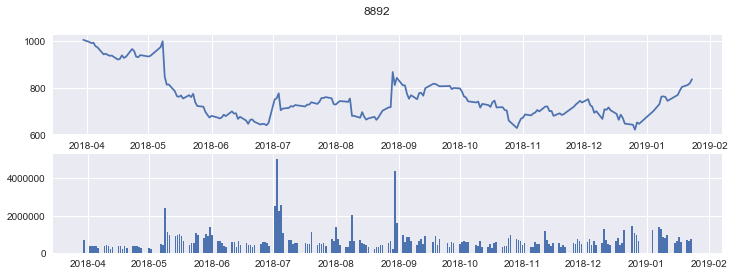

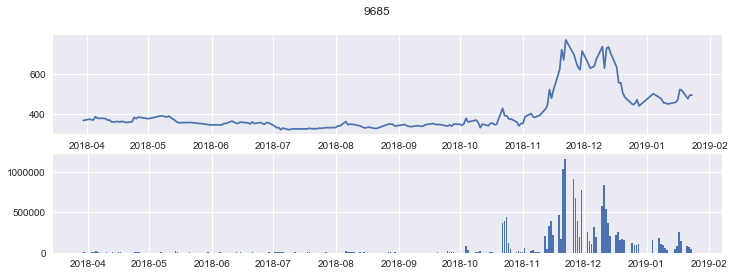

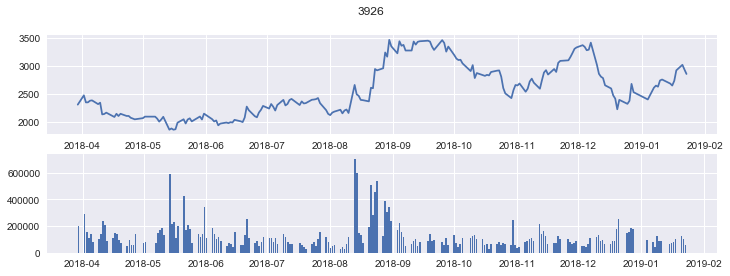

In [8]:
num = len(codes)
for i in range(len(codes)):
    key = str(codes[i])
    fig, axes = plt.subplots(nrows=num, ncols=1, figsize=(12, 4), sharex=True) #, gridspec_kw={'height_ratios': [2,1]})
    fig.suptitle("{}".format(codes[i]))
    plt.subplot(2, 1, 1)
    plt.plot(dfs[key].Date, dfs[key].Close)
    plt.subplot(2,1,2)
    plt.bar(dfs[key].Date, dfs[key].Volume)
    #ax2.xaxis_date()
    axes[i].grid()
    plt.show()

## position with SMA

In [11]:
SMA1 = 42
SMA2 = 100
key = str(codes[2])

data = (
    pd.DataFrame(dfs[key]).dropna()
)
data['SMA1'] = data.Close.rolling(SMA1).mean()
data['SMA2'] = data.Close.rolling(SMA2).mean()
data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,Position
195,2019-01-17,2695,2769,2624,2730,2730,83400,2823.809524,2924.10,-1
196,2019-01-18,2730,2928,2691,2916,2916,106800,2831.595238,2929.41,-1
197,2019-01-21,3000,3170,3000,3015,3015,123400,2838.142857,2935.93,-1
198,2019-01-22,2993,3000,2892,2931,2931,101700,2839.428571,2939.18,-1
199,2019-01-23,2929,2930,2816,2852,2852,59800,2837.809524,2941.73,-1


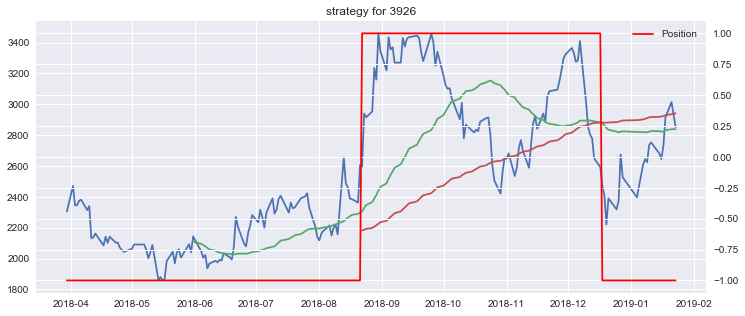

In [12]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

plt.title("strategy for {}".format(key))
ax1.plot(data.Date, data.Close)
ax1.plot(data.Date, data.SMA1)
ax1.plot(data.Date, data.SMA2)
ax2.plot(data.Date, data.Position, color='r')
plt.legend()
plt.show()

## vectorized backtesting

In [13]:
data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Strategy'] = data['Position'].shift(1) * data['Returns']
data.round(4).head()

,Date,Open,High,Low,Close,Adj Close,Volume,SMA1,SMA2,Position,Returns,Strategy
0,2018-03-30,2440,2491,2278,2305,2305,198400,NaN,NaN,-1,NaN,NaN
1,2018-04-02,2429,2513,2390,2471,2471,288500,NaN,NaN,-1,0.0695,-0.0695
2,2018-04-03,2424,2439,2325,2345,2345,154800,NaN,NaN,-1,-0.0523,0.0523
3,2018-04-04,2360,2370,2286,2346,2346,107400,NaN,NaN,-1,0.0004,-0.0004
4,2018-04-05,2369,2415,2319,2375,2375,140300,NaN,NaN,-1,0.0123,-0.0123


In [14]:
data.dropna(inplace=True)
np.exp(data[['Returns', 'Strategy']].sum())

Returns     1.094398
Strategy    0.826561
dtype: float64

make sure to understand the following equation

In [15]:
data[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.671265
Strategy    0.670742
dtype: float64

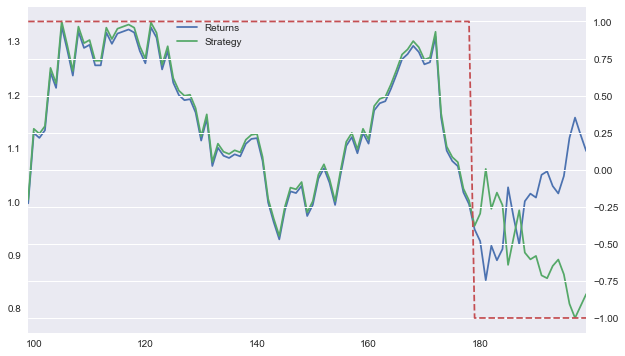

In [16]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

## optimization (using brute force) SKIPPED!

## Linear OLS Regression

In [19]:
raw = pd.read_csv('./data/tr_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [20]:
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [21]:
symbol = 'EUR='
data = pd.DataFrame(raw[symbol])
data['returns'] = np.log(data / data.shift(1))
data.dropna(inplace=True)
data['direction'] = np.sign(data['returns']).astype(int)
data.head()

,EUR=,returns,direction
Date,,,
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
2010-01-11,1.4513,0.006984,1


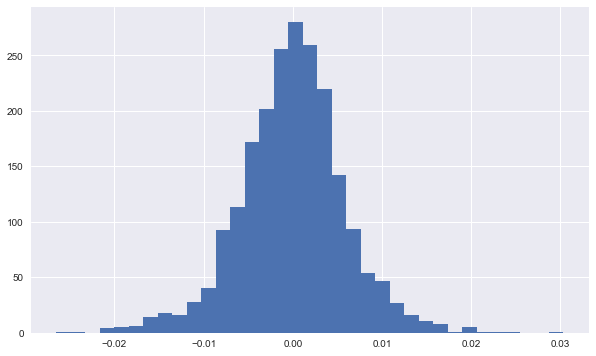

In [23]:
data['returns'].hist(bins=35, figsize=(10, 6))

In [24]:
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [26]:
create_lags(data)
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,1.4368,-0.002988,-1,NaN,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,NaN
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544


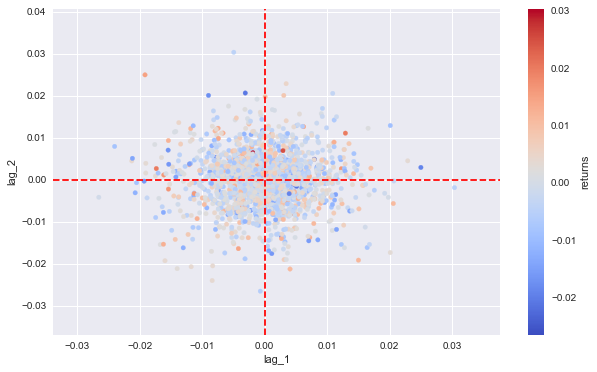

In [28]:
data.dropna(inplace=True)
data.plot.scatter(x='lag_1', y='lag_2', c='returns', cmap='coolwarm', figsize=(10, 6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')

## regression

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [32]:
data['pos_ols_1'] = model.fit(data[cols], data['returns']).predict(data[cols])
data['pos_ols_2'] = model.fit(data[cols], data['direction']).predict(data[cols])
data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-0.000166,-0.000086
2010-01-08,0.000017,0.040404
2010-01-11,-0.000244,-0.011756
2010-01-12,-0.000139,-0.043398
2010-01-13,-0.000022,0.002237


In [34]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)
data['pos_ols_1'].value_counts()
data['pos_ols_2'].value_counts()

 1    1377
-1     758
Name: pos_ols_2, dtype: int64

In [36]:
(data['pos_ols_1'].diff() != 0).sum()

555

In [37]:
(data['pos_ols_2'].diff() != 0).sum()

762

In [38]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        0.810644
strat_ols_1    0.942422
strat_ols_2    1.339286
dtype: float64

In [39]:
(data['direction'] == data['pos_ols_1']).value_counts()

False    1093
True     1042
dtype: int64

In [40]:
(data['direction'] == data['pos_ols_2']).value_counts()

True     1096
False    1039
dtype: int64

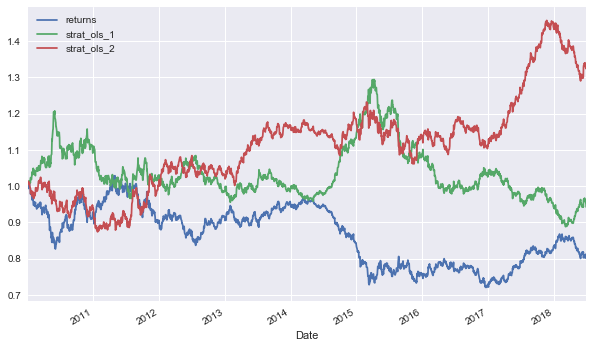

In [41]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10, 6))

## clustering

In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, random_state=0)

In [45]:
model.fit(data[cols])
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, n_clusters=2, 
       n_init=10, n_jobs=None, precompute_distances='auto',
      random_state=0, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [46]:
data['pos_clus'] = model.predict(data[cols])
data['pos_clus'] = np.where(data['pos_clus'] == 1, -1, 1)
data['pos_clus'].values

array([-1,  1, -1, ...,  1,  1, -1])

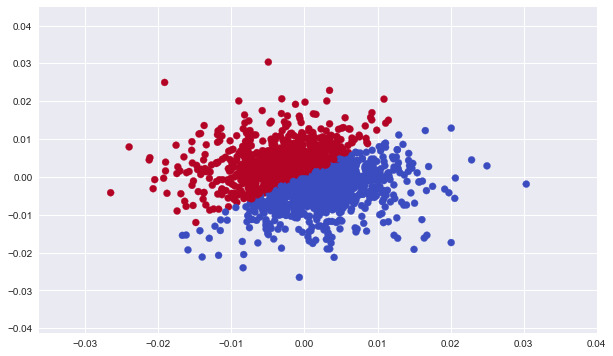

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(data[cols].iloc[:, 0], data[cols].iloc[:, 1], c=data['pos_clus'], cmap='coolwarm')

In [49]:
data['strat_clus'] = data['pos_clus'] * data['returns']
data[['returns', 'strat_clus']].sum().apply(np.exp)
(data['direction'] == data['pos_clus']).value_counts()

True     1077
False    1058
dtype: int64

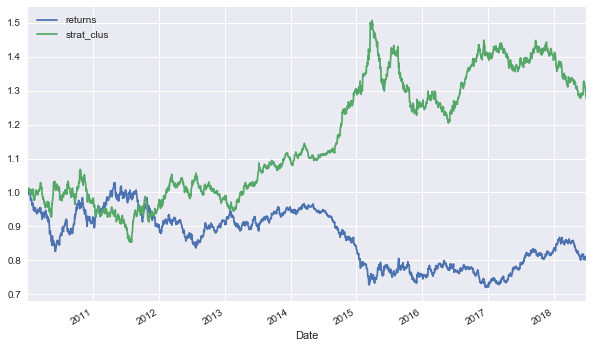

In [50]:
data[['returns', 'strat_clus']].cumsum().apply(np.exp).plot(figsize=(10, 6))

## my trade history

In [18]:
history = pd.read_csv('./data/tradehistory(JP)_20190117.csv', encoding="shift-jis")
history.tail()

,約定日,受渡日,銘柄コード,銘柄名,市場名称,口座区分,取引区分,売買区分,信用区分,弁済期限,...,建単価［円］,建手数料［円］,建手数料消費税［円］,金利（支払）〔円〕,金利（受取）〔円〕,逆日歩／特別空売り料（支払）〔円〕,逆日歩（受取）〔円〕,貸株料,事務管理費〔円〕（税抜）,名義書換料〔円〕（税抜）
14,2019/1/16,2019/1/21,6182,ロゼッタ,東証,NISA,現物,売付,-,-,...,0.0,0,0,0,0,0,0,0,0,0
15,2019/1/16,2019/1/21,6494,ＮＦＫホールディングス,東証,NISA,現物,買付,-,-,...,0.0,0,0,0,0,0,0,0,0,0
16,2019/1/16,2019/1/21,6494,ＮＦＫホールディングス,東証,NISA,現物,売付,-,-,...,0.0,0,0,0,0,0,0,0,0,0
17,2019/1/16,2019/1/21,8892,日本エスコン,東証,NISA,現物,売付,-,-,...,0.0,0,0,0,0,0,0,0,0,0
18,2019/1/16,2019/1/21,9006,京浜急行,東証,NISA,現物,売付,-,-,...,0.0,0,0,0,0,0,0,0,0,0


In [19]:
history['売買区分'] = history['売買区分'].apply(lambda x : 'bid' if x == '買付' else 'ask')

In [20]:
history.head()

,約定日,受渡日,銘柄コード,銘柄名,市場名称,口座区分,取引区分,売買区分,信用区分,弁済期限,...,建単価［円］,建手数料［円］,建手数料消費税［円］,金利（支払）〔円〕,金利（受取）〔円〕,逆日歩／特別空売り料（支払）〔円〕,逆日歩（受取）〔円〕,貸株料,事務管理費〔円〕（税抜）,名義書換料〔円〕（税抜）
0,2019/1/4,2019/1/9,4588,オンコリスバイオファーマ,Chi-X,NISA,現物,bid,-,-,...,0.0,0,0,0,0,0,0,0,0,0
1,2019/1/4,2019/1/9,6840,ＡＫＩＢＡホールディングス,東証,NISA,現物,bid,-,-,...,0.0,0,0,0,0,0,0,0,0,0
2,2019/1/4,2019/1/9,6840,ＡＫＩＢＡホールディングス,東証,NISA,現物,ask,-,-,...,0.0,0,0,0,0,0,0,0,0,0
3,2019/1/7,2019/1/10,4588,オンコリスバイオファーマ,東証,NISA,現物,ask,-,-,...,0.0,0,0,0,0,0,0,0,0,0
4,2019/1/7,2019/1/10,8892,日本エスコン,東証,NISA,現物,bid,-,-,...,0.0,0,0,0,0,0,0,0,0,0


In [65]:
date_contract = history['約定日']
code = history['銘柄コード']
name = history['銘柄名']
action = history['売買区分']
price = history['受渡金額［円］']

mh = pd.DataFrame(
    {
        'date': pd.to_datetime(date_contract),
        'code': code,
        'name': name,
        'action': action,
        'price': price
    }
)

mh.head()

,date,code,name,action,price
0,2019-01-04,4588,オンコリスバイオファーマ,bid,"125,500"
1,2019-01-04,6840,ＡＫＩＢＡホールディングス,bid,"119,800"
2,2019-01-04,6840,ＡＫＩＢＡホールディングス,ask,"121,800"
3,2019-01-07,4588,オンコリスバイオファーマ,ask,"118,000"
4,2019-01-07,8892,日本エスコン,bid,"73,300"


In [66]:
mh.price = pd.to_numeric(mh.price.str.replace(',', ''))
mh.head()

,date,code,name,action,price
0,2019-01-04,4588,オンコリスバイオファーマ,bid,125500
1,2019-01-04,6840,ＡＫＩＢＡホールディングス,bid,119800
2,2019-01-04,6840,ＡＫＩＢＡホールディングス,ask,121800
3,2019-01-07,4588,オンコリスバイオファーマ,ask,118000
4,2019-01-07,8892,日本エスコン,bid,73300


In [67]:
df1_bid = mh[(mh.code == c) & (mh.action == 'bid')]
df1_ask = mh[(mh.code == c) & (mh.action == 'ask')]
df1_bid.head()

,date,code,name,action,price
12,2019-01-16,6182,ロゼッタ,bid,236770
13,2019-01-16,6182,ロゼッタ,bid,226400


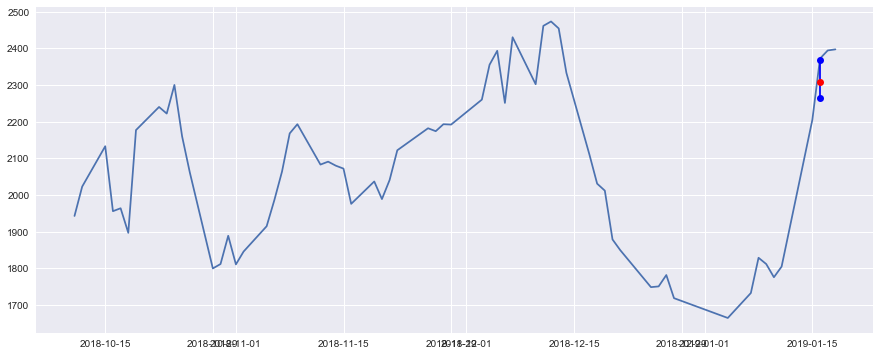

In [69]:
num_stocks = 100
plt.figure(figsize=(15, 6))
plt.plot(df.Date, df.Close)
plt.plot(df1_bid.date, df1_bid.price / num_stocks, color='blue', marker='o')
plt.plot(df1_ask.date, df1_ask.price / num_stocks, color='red', marker='o')
plt.show()

In [ ]:
qf = cf.QuantFig(df)
qf.add_bollinger_bands()
qf.add_volume()
qf.add_macd()
qf.iplot()

### percent change plot with nikkei255

In [0]:
nikkei = web.DataReader('^N225', 'yahoo', start, end)

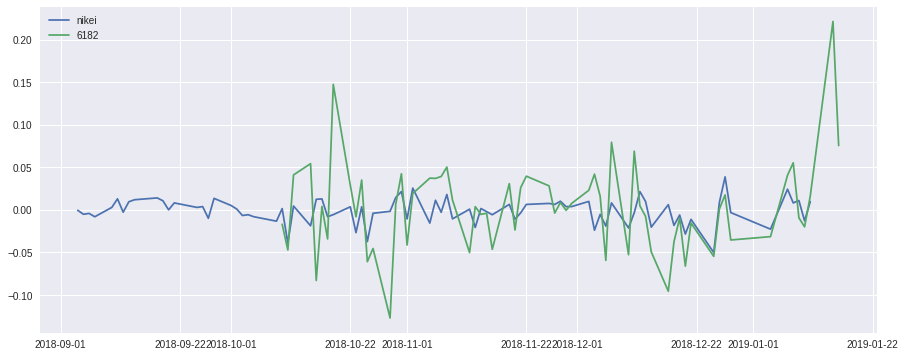

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(nikkei.Close.pct_change(), label='nikei')
plt.plot(df.Close.pct_change(), label=str(c))
plt.legend()
plt.show()

### logarithmic returns

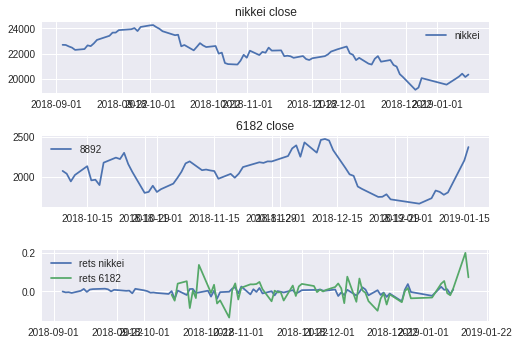

In [15]:
rets_nikkei = np.log(nikkei.Close / nikkei.Close.shift(1))
#rets_nikkei.head()

rets = np.log(df.Close / df.Close.shift(1))

plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.subplot(3,1,1)
#plt.figure(figsize=(15,6))
plt.plot(nikkei.Close, label='nikkei')
plt.title('nikkei close')
plt.legend()

plt.subplot(3,1,2)
plt.plot(df.Close, label='8892')
plt.title("{} close".format(str(c)))
plt.legend()

plt.subplot(3,1,3)
#plt.figure(figsize=(15, 6))
plt.plot(rets_nikkei, label='rets nikkei')
plt.plot(rets, label="rets {}".format(str(c)))
plt.legend()
#plt.show()

### scattering plot for logarithmic returns

In [16]:
tmp = np.log(nikkei.Close / nikkei.Close.shift(1))
df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
type(tmp)

pandas.core.series.Series

In [17]:
df_compare = pd.merge(nikkei, df)
df_compare.head()
#df_compare.describe()

,High,Low,Open,Close,Volume,Adj Close


In [18]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-09,2081,2088,2011,2074,2074,38000
2018-10-10,2092,2098,1977,2039,2039,86900
2018-10-11,1872,1971,1859,1943,1943,117400
2018-10-12,1940,2041,1933,2023,2023,59600
2018-10-15,2110,2182,2050,2133,2133,172400


In [0]:
merged = pd.merge(
    rets_nikkei.to_frame().reset_index(), 
    rets.to_frame().reset_index(),
    on='Date'
)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a8fef5b38>,
      dtype=object)

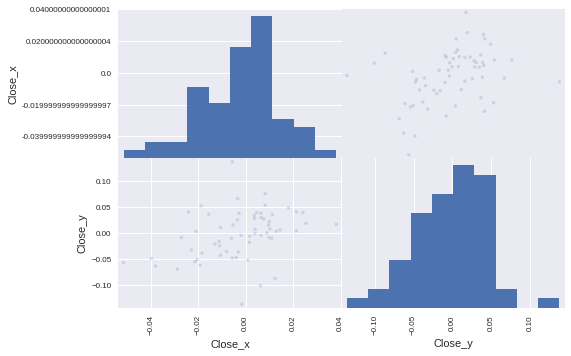

In [21]:
pd.plotting.scatter_matrix(merged, alpha=0.2)

## stochastics

In [0]:
import math
import numpy as np
import numpy.random as npr
from pylab import plt, mpl
plt.style.use('seaborn')


In [0]:
import scipy.stats as scs

#### Black-Scholes-Merton

In [0]:
S0 = 100
r = 0.05 # constant riskless short rate
sigma = 0.25 # constant volatility
T = 2.0
I = 10000 # number of simulations
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * math.sqrt(T) * npr.standard_normal(I))

Text(0,0.5,'frequency')

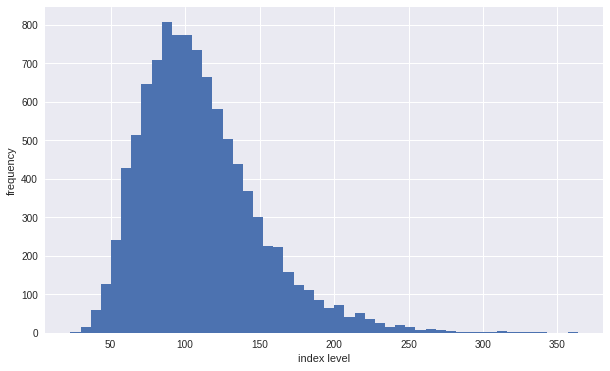

In [0]:
plt.figure(figsize=(10,6))
plt.hist(ST1,bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [0]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T, sigma * math.sqrt(T), size=I)

Text(0,0.5,'frequency')

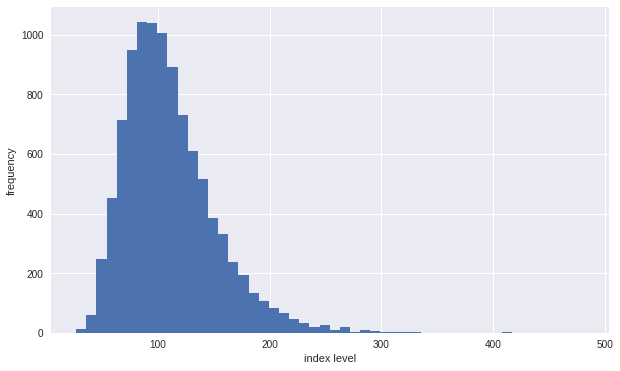

In [0]:
plt.figure(figsize=(10,6))
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

## normality tests

In [0]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [0]:
def gen_paths(S0, r, sigma, T, M, I):
  """location 17163 generate sample Monte Carlo paths for geometric brownian motion"""
  dt = T / M
  paths = np.zeros((M + 1, I))
  paths[0] = S0
  for t in range(1, M + 1):
    rand = np.random.standard_normal(I)
    rand = (rand - rand.mean()) / rand.std()
    paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)
  return paths

In [0]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000
np.random.seed(1000)

In [0]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [0]:
S0 * math.exp(r * T)

105.12710963760242

In [0]:
paths[-1].mean()

105.12645392478755

Text(0,0.5,'index level')

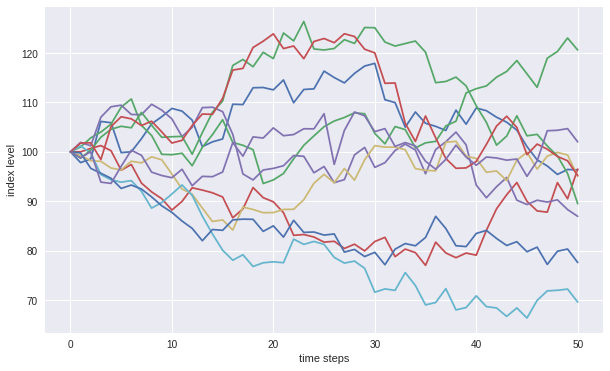

In [0]:
plt.figure(figsize=(10,6))
plt.plot(paths[:,:10])
plt.xlabel('time steps')
plt.ylabel('index level')

In [0]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [0]:
log_returns = np.log(paths[1:] / paths[:-1])

In [0]:
log_returns[:,1].round(4)

array([ 0.0098,  0.0182,  0.0113,  0.0153,  0.0321,  0.0152, -0.0496,
       -0.0195, -0.0376, -0.0008,  0.003 , -0.0258,  0.0377,  0.0252,
        0.0288, -0.0442, -0.0058, -0.0088, -0.0707,  0.0078,  0.0137,
        0.0306,  0.0273,  0.0187,  0.0178,  0.0109,  0.0067,  0.0088,
       -0.0017, -0.0377, -0.0205,  0.0339, -0.0059, -0.0361,  0.0101,
        0.0029,  0.0302,  0.0091,  0.0526,  0.0076,  0.0049,  0.0155,
        0.01  ,  0.0188, -0.023 , -0.0237,  0.0508,  0.0113,  0.0224,
       -0.02  ])

In [0]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))


In [0]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [0]:
log_returns.mean() * M + 0.5 * sigma ** 2

0.05000000000000006

In [0]:
log_returns.std() * math.sqrt(M)

0.20000000000000015

## from Qiita
https://qiita.com/innovation1005/items/199df28af6fc0d60a4b0

In [25]:
DJ=['AAPL','AXP','BA','CAT','CSCO','CVX','DIS','DWDP','GS','HD',
    'IBM','INTC','JNJ','JPM','KO','MCD','MMM','MRK','MSFT','NKE',
    'PFE','PG','TRV','UNH','UTX','V','VZ','WBA','WMT','XOM']
m = [] # holds average for each
v = [] # holds std for each

for i in range(len(DJ)):
    tsd = web.DataReader(DJ[i], "yahoo", '2009/1/1')
    lntsd = np.log(tsd.iloc[:,5])
    m.append((lntsd.diff().dropna().mean() + 1 )** 250 - 1) # ?
    v.append(lntsd.diff().dropna().std() * np.sqrt(250))
    print('{0: 03d}'.format(i+1),'{0:7s}'.format(DJ[i]),'平均{0:5.2f}'.format(m[i]),
          'ボラティリティ {0:5.2f}'.format(v[i]),'m/v {0:5.2f}'.format(m[i]/v[i]),
          ' データ数{0:10d}'.format(len(tsd)))
v_m = pd.DataFrame({'v':v, 'm':m})

 01 AAPL    平均 0.34 ボラティリティ  0.27 m/v  1.26  データ数      2530
 02 AXP     平均 0.20 ボラティリティ  0.32 m/v  0.63  データ数      2530
 03 BA      平均 0.27 ボラティリティ  0.26 m/v  1.02  データ数      2530
 04 CAT     平均 0.15 ボラティリティ  0.31 m/v  0.50  データ数      2530
 05 CSCO    平均 0.13 ボラティリティ  0.26 m/v  0.50  データ数      2530
 06 CVX     平均 0.08 ボラティリティ  0.22 m/v  0.37  データ数      2530
 07 DIS     平均 0.19 ボラティリティ  0.23 m/v  0.80  データ数      2530
 08 DWDP    平均 0.18 ボラティリティ  0.34 m/v  0.52  データ数      2530
 09 GS      平均 0.10 ボラティリティ  0.31 m/v  0.33  データ数      2530
 10 HD      平均 0.26 ボラティリティ  0.22 m/v  1.16  データ数      2530
 11 IBM     平均 0.07 ボラティリティ  0.20 m/v  0.34  データ数      2530
 12 INTC    平均 0.16 ボラティリティ  0.26 m/v  0.63  データ数      2530
 13 JNJ     平均 0.11 ボラティリティ  0.15 m/v  0.75  データ数      2530
 14 JPM     平均 0.15 ボラティリティ  0.35 m/v  0.44  データ数      2530
 15 KO      平均 0.12 ボラティリティ  0.16 m/v  0.78  データ数      2530
 16 MCD     平均 0.15 ボラティリティ  0.16 m/v  0.90  データ数      2530
 17 MMM     平均 0.16 ボラティリティ  0.20 m/v  0

AttributeError: module 'seaborn' has no attribute 'joinplot'

/Users/sishida/.pyenv/versions/3.6.3/envs/btc3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



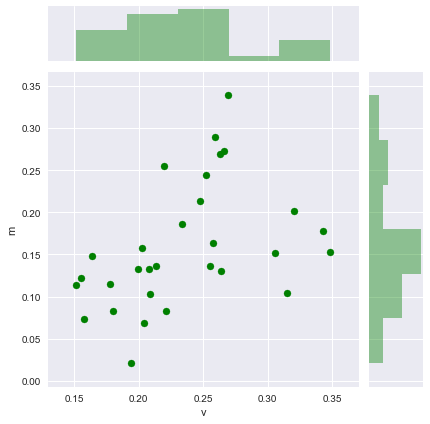

In [26]:
sns.jointplot(x='v', y='m', data=v_m, color="g")

https://qiita.com/ynakayama/items/1801d374224d6914a382

In [27]:
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']

<Figure size 432x288 with 0 Axes>

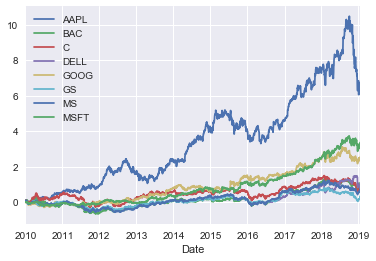

In [30]:
names = ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']
px = pd.DataFrame({n: get_px(n, '1/1/2010', '1/17/2019') for n in names})
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
result = ((1 + rets).cumprod() - 1) # ?

plt.figure()
result.plot()
plt.show()